# Simulating the likelihood that the most extreme point of two correlated variables is the same
Inspired by <https://www.lesswrong.com/posts/dC7mP5nSwvpL65Qu5/why-the-tails-come-apart>

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

Generating 2 samples of 1000 elements correlated aproximately 0.7

In [103]:
x, y = np.random.multivariate_normal([0,0], [[1,.7], [.7,1]], 1000).T
st.pearsonr(x, y)

(0.7184425957316478, 1.6283836630579774e-159)

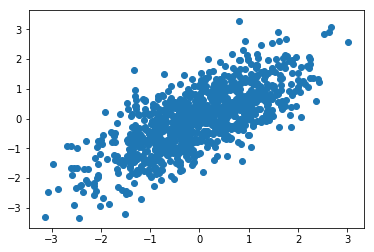

In [104]:
plt.scatter(x, y)

Function simulates several random samplings and calculates the average number of times that the largest endpoint was the same in both variables

In [105]:
def calc_same(corr, sample, simulations):
    a = []
    for i in range(simulations):
        x, y = np.random.multivariate_normal([0,0], [[1,corr], [corr,1]], sample).T
        a.append(np.argmax(x) == np.argmax(y))
    return(np.mean(a))    

Testing sample sizes of 10, 20, and 500, for correlations ranging from [0 to 1]

In [106]:
sames = [[], [], []]
samples = [10,50,500]
corrs = np.linspace(0,1,10)

for corr in corrs:
    for si, s in enumerate(samples):
        sames[si].append(calc_same(corr, s, 1000))

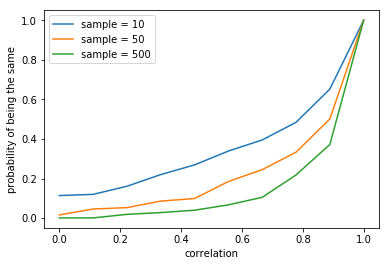

In [108]:
for same, sample in zip(sames, samples):
    plt.plot(corrs, same, label=f'sample = {sample}')
plt.xlabel('correlation')
plt.ylabel('probability of being the same')
plt.legend();

We can see that the matches depend strongly on the magnitude of the correlation and to a lesser extent on the sampling size.

Next, I repeat the same focusing only on correlations in the range [0.8,1]

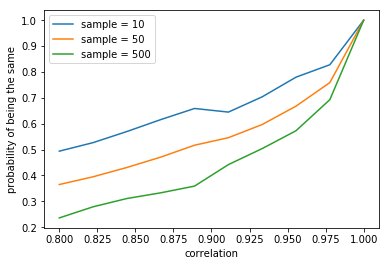

In [111]:
sames = [[], [], []]
samples = [10,50,500]
corrs = np.linspace(.8,1,10)

for corr in corrs:
    for si, s in enumerate(samples):
        sames[si].append(calc_same(corr, s, 1000))
        
for same, sample in zip(sames, samples):
    plt.plot(corrs, same, label=f'sample = {sample}')
plt.xlabel('correlation')
plt.ylabel('probability of being the same')
plt.legend();

And on correlations [0.95,1]

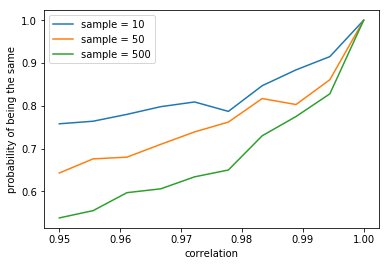

In [112]:
# now focused on correlations [0.95, 1]
sames = [[], [], []]
samples = [10,50,500]
corrs = np.linspace(.95,1,10)

for corr in corrs:
    for si, s in enumerate(samples):
        sames[si].append(calc_same(corr, s, 1000))
        
for same, sample in zip(sames, samples):
    plt.plot(corrs, same, label=f'sample = {sample}')
plt.xlabel('correlation')
plt.ylabel('probability of being the same')
plt.legend()

With a correlation equal or larger than 0.95, and even with a sample of 500 points, it is expected that the maximum datapoint of the two variables will be the very same over 50% of the time